# Mushroom Classification

## Importing libraries and Data


In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import time
%matplotlib inline
warnings.filterwarnings('ignore')

Importing and initialising models

In [34]:
from sklearn.metrics import accuracy_score,classification_report
classifier=[]
imported_as=[]

#MultiLayerPerceptron
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier()
classifier.append('Multi Layer Perceptron')
imported_as.append('mlp')

#Bagging
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
classifier.append('Bagging')
imported_as.append('bc')

#GBC
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
classifier.append('Gradient Boosting')
imported_as.append('gbc')

#ADA
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
classifier.append('Ada Boost')
imported_as.append('ada')

#XGB
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier() 
classifier.append('XG Boost')
imported_as.append('xgb')

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
classifier.append('Logistic Regression')
imported_as.append('lr')

#RFC
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
classifier.append('Random Forest')
imported_as.append('rfc')

#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
classifier.append('k Nearest Neighbours')
imported_as.append('knn')

#SVM
from sklearn.svm import SVC
svc = SVC()
classifier.append('Support Vector Machine')
imported_as.append('svc')

#Grid
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000,2000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
classifier.append('SVM tuning grid')
imported_as.append('grid')

#STcaking
from sklearn.ensemble import StackingClassifier
estimators=[('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
            ('svr',SVC(random_state=42))]
stc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
classifier.append('Stacked (RFR & SVM)')
imported_as.append('stc')

classifiers = pd.DataFrame({'Classifier':classifier,'Imported as':imported_as})
print('All Models Imported\nModels stored in dataframe called classifiers')

All Models Imported
Models stored in dataframe called classifiers


Creating _Modelling_ Class

In [35]:
class Modelling:
    def __init__(self, X_train, Y_train, X_test, Y_test, models):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        self.models = models
    
    def fit(self):
        model_acc = []
        model_time= []
        for i in self.models:
            start=time.time()
            if i == 'knn':
                accuracy = []
                for j in range(1,200):    
                    kn = KNeighborsClassifier(n_neighbors=j)
                    kn.fit(self.X_train,self.Y_train)
                    predK = kn.predict(self.X_test)
                    accuracy.append([accuracy_score(self.Y_test,predK),j])
                temp = accuracy[0]
                for m in accuracy:
                    if temp[0] < m[0]:
                        temp=m
                i = KNeighborsClassifier(n_neighbors=temp[1])
            i.fit(self.X_train,self.Y_train)
            model_acc.append(accuracy_score(self.Y_test,i.predict(self.X_test)))
            stop=time.time()
            model_time.append((stop-start))
            print(i,'has been fit')
        self.models_output = pd.DataFrame({'Models':self.models,'Accuracy':model_acc,'Runtime (s)':model_time})
        
    def results(self):
        models=self.models_output
        models = models.sort_values(by=['Accuracy','Runtime (s)'],ascending=[False,True]).reset_index().drop('index',axis=1)
        self.best = models['Models'][0]
        models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
        models['Accuracy']=models['Accuracy'].round(5)*100
        self.models_output_cleaned=models
        return(models)
        
    def best_model(self,type):
        if type=='model':
            return(self.best)
        elif type=='name':
            return(self.models_output_cleaned['Models'][0])
    
    def best_model_accuracy(self):
        return(self.models_output_cleaned['Accuracy'][0])
    
    def best_model_runtime(self):
        return(round(self.models_output_cleaned['Runtime (s)'][0],3))
    
    def best_model_predict(self,X_test):
        return(self.best.predict(X_test))
    
    def best_model_clmatrix(self):
        return(classification_report(self.Y_test,self.best.predict(self.X_test)))

Importing Data

In [36]:
data = pd.read_csv('mushrooms.csv')

In [37]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## EDA

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [39]:
uniquevals=[]
for i in data.drop('class',axis=1).columns:
    uniquevals.append(len(data[i].unique()))
display(pd.DataFrame({'Column Name':data.drop('class',axis=1).columns,'Unique Value count':uniquevals}))

,Column Name,Unique Value count
0,cap-shape,6
1,cap-surface,4
2,cap-color,10
3,bruises,2
4,odor,9
5,gill-attachment,2
6,gill-spacing,2
7,gill-size,2
8,gill-color,12
9,stalk-shape,2


Since there is only value in _veil-type_ for all features, we can drop this column

In [40]:
data=data.drop('veil-type',axis=1)

<AxesSubplot:xlabel='class', ylabel='count'>

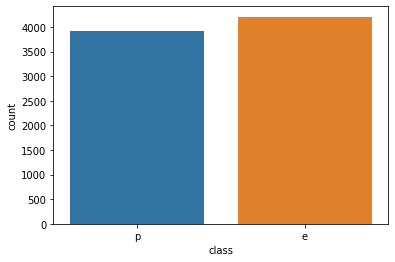

In [41]:
sns.countplot(data=data,x='class')

Countplots of various features

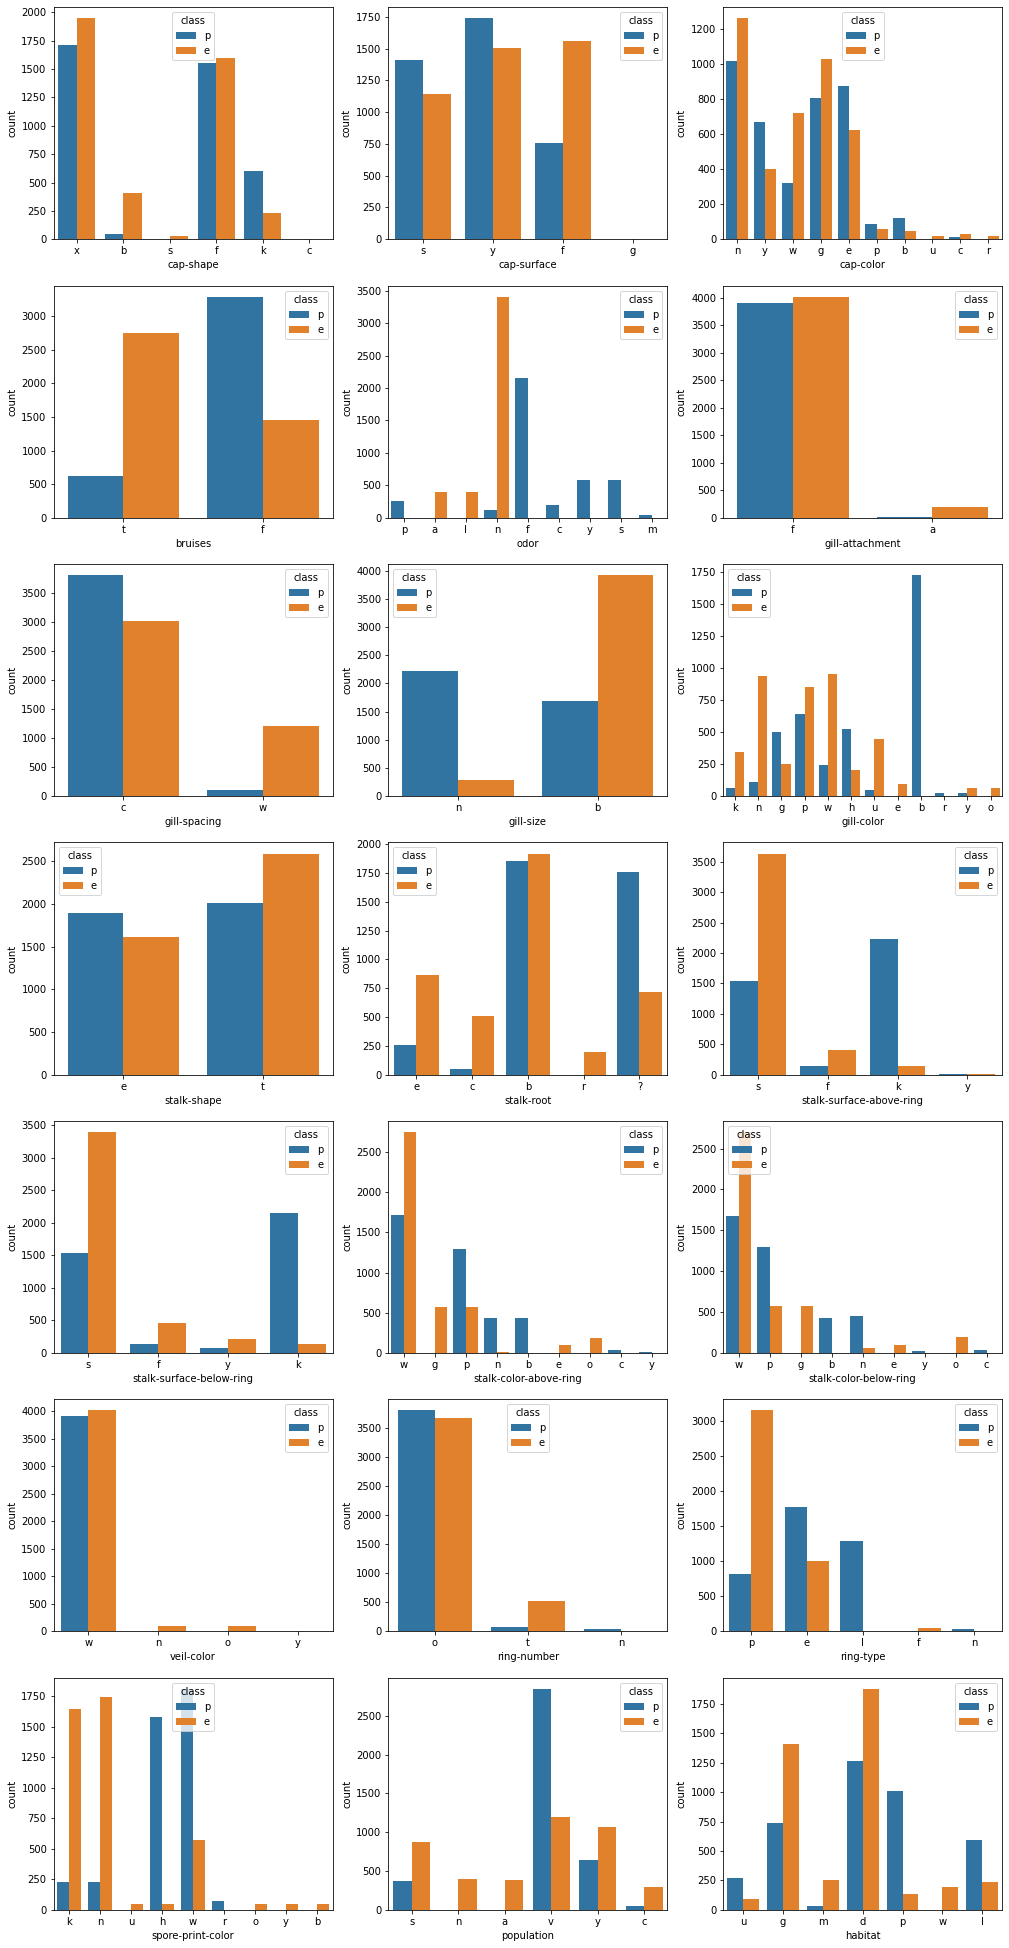

In [42]:
plt.figure(figsize=(17,35))
m=1
for i in data.drop('class',axis=1):
    plt.subplot(7, 3, m)
    sns.countplot(x=data[i],hue=data['class'],)
    m=m+1

# Cardinal Encoding


In [43]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dfs = []
for i in data.drop('class',axis=1).columns:
    temp = pd.DataFrame({'Before Encoding':data[i].unique(),'After Encoding':label_encoder.fit_transform(data[i].unique())})
    dfs.append([temp.sort_values(by=['After Encoding']),i])
    data[i] = label_encoder.fit_transform(data[i])
for i in dfs:
    print(i[1])
    display(i[0])
    print('\n')

cap-shape


,Before Encoding,After Encoding
1,b,0
5,c,1
3,f,2
4,k,3
2,s,4
0,x,5




cap-surface


,Before Encoding,After Encoding
2,f,0
3,g,1
0,s,2
1,y,3




cap-color


,Before Encoding,After Encoding
6,b,0
8,c,1
4,e,2
3,g,3
0,n,4
5,p,5
9,r,6
7,u,7
2,w,8
1,y,9




bruises


,Before Encoding,After Encoding
1,f,0
0,t,1




odor


,Before Encoding,After Encoding
1,a,0
5,c,1
4,f,2
2,l,3
8,m,4
3,n,5
0,p,6
7,s,7
6,y,8




gill-attachment


,Before Encoding,After Encoding
1,a,0
0,f,1




gill-spacing


,Before Encoding,After Encoding
0,c,0
1,w,1




gill-size


,Before Encoding,After Encoding
1,b,0
0,n,1




gill-color


,Before Encoding,After Encoding
8,b,0
7,e,1
2,g,2
5,h,3
0,k,4
1,n,5
11,o,6
3,p,7
9,r,8
6,u,9




stalk-shape


,Before Encoding,After Encoding
0,e,0
1,t,1




stalk-root


,Before Encoding,After Encoding
4,?,0
2,b,1
1,c,2
0,e,3
3,r,4




stalk-surface-above-ring


,Before Encoding,After Encoding
1,f,0
2,k,1
0,s,2
3,y,3




stalk-surface-below-ring


,Before Encoding,After Encoding
1,f,0
3,k,1
0,s,2
2,y,3




stalk-color-above-ring


,Before Encoding,After Encoding
4,b,0
7,c,1
5,e,2
1,g,3
3,n,4
6,o,5
2,p,6
0,w,7
8,y,8




stalk-color-below-ring


,Before Encoding,After Encoding
3,b,0
8,c,1
5,e,2
2,g,3
4,n,4
7,o,5
1,p,6
0,w,7
6,y,8




veil-color


,Before Encoding,After Encoding
1,n,0
2,o,1
0,w,2
3,y,3




ring-number


,Before Encoding,After Encoding
2,n,0
0,o,1
1,t,2




ring-type


,Before Encoding,After Encoding
1,e,0
3,f,1
2,l,2
4,n,3
0,p,4




spore-print-color


,Before Encoding,After Encoding
8,b,0
3,h,1
0,k,2
1,n,3
6,o,4
5,r,5
2,u,6
4,w,7
7,y,8




population


,Before Encoding,After Encoding
2,a,0
5,c,1
1,n,2
0,s,3
3,v,4
4,y,5




habitat


,Before Encoding,After Encoding
3,d,0
1,g,1
6,l,2
2,m,3
4,p,4
0,u,5
5,w,6


## Feature Splitting

Splitting into targets and features

In [44]:
X = data.drop('class',axis=1)
Y = data['class']

## Test Train Split

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=100)

## Modelling

In [46]:
display(classifiers)

,Classifier,Imported as
0,Multi Layer Perceptron,mlp
1,Bagging,bc
2,Gradient Boosting,gbc
3,Ada Boost,ada
4,XG Boost,xgb
5,Logistic Regression,lr
6,Random Forest,rfc
7,k Nearest Neighbours,knn
8,Support Vector Machine,svc
9,SVM tuning grid,grid


In [47]:
models_to_test = [bc,gbc,ada,xgb,rfc,knn]

In [48]:
classification = Modelling(X_train,Y_train,X_test,Y_test,models_to_test)
classification.fit()

BaggingClassifier() has been fit
GradientBoostingClassifier() has been fit
AdaBoostClassifier() has been fit
[18:02:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None

In [49]:
classification.results()

,Models,Accuracy,Runtime (s)
0,BaggingClassifier,100.0,0.059839
1,XGBClassifier,100.0,0.104719
2,KNeighborsClassifier,100.0,0.190491
3,RandomForestClassifier,100.0,0.252326
4,AdaBoostClassifier,100.0,0.312165
5,GradientBoostingClassifier,100.0,0.397189


In [50]:
print('BestModel is:',  classification.best_model(type='name'))
print('Accuracy of model:',classification.best_model_accuracy())
print('Training Runtime in seconds',classification.best_model_runtime())
print('Classification Matrix:\n')
print(classification.best_model_clmatrix())

BestModel is: BaggingClassifier
Accuracy of model: 100.0
Training Runtime in seconds 0.06
Classification Matrix:

              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1258
           p       1.00      1.00      1.00      1180

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

